<a href="https://colab.research.google.com/github/karthicsalem/fods-sem-5/blob/master/Bigmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import  scipy as sc
%matplotlib inline


In [55]:
df=pd.read_csv('https://github.com/karthicsalem/fods-sem-5/raw/master/bigmart.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [56]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [57]:
df.shape

(8523, 12)

In [58]:
df['Item_Weight'].nunique()

415

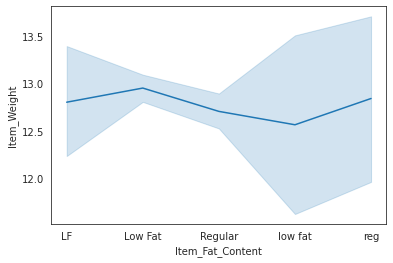

In [59]:
sns.set_style('white')
sns.lineplot(df['Item_Fat_Content'],df['Item_Weight'])

In [60]:
d=df.copy()

In [61]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Modifying Fat Category

In [62]:
d['Item_Fat_Content'] = d['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
d['Item_Fat_Content'].nunique()

2

In [63]:
d['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [64]:
d['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [65]:
a=d.groupby(['Item_Type','Item_Fat_Content'])
a

In [66]:
a.mean()

Item_Weight  ...  Item_Outlet_Sales
Item_Type             Item_Fat_Content               ...                   
Baking Goods          Low Fat             12.552996  ...        1764.509636
                      Regular             12.013303  ...        2147.340665
Breads                Low Fat             12.429912  ...        2183.434031
                      Regular             10.002143  ...        2230.238058
Breakfast             Low Fat             11.849412  ...        2425.411966
                      Regular             13.336182  ...        1925.464652
Canned                Low Fat             11.864650  ...        2208.714377
                      Regular             12.804289  ...        2243.441202
Dairy                 Low Fat             13.391497  ...        2145.174151
                      Regular             13.483797  ...        2370.875970
Frozen Foods          Low Fat             12.580333  ...        2117.535472
                      Regular             13.180539  ...        2149.861640
Fruits and Vegetables Low Fat             12.757046  ...        2182.405740
                      Regular             13.708363  ...        2400.571761
Hard Drinks           Low Fat             11.400328  ...        2139.221622
Health and Hygiene    Low Fat             13.142314  ...        2010.000265
Household             Low Fat             13.384736  ...        2258.784300
Meat                  Low Fat             13.565644  ...        2035.616920
                      Regular             12.335512  ...        2241.218571
Others                Low Fat             13.853285  ...        1926.139702
Seafood               Low Fat             13.805345  ...        1907.786919
                      Regular             10.901818  ...        2899.263089
Snack Foods           Low Fat             13.707177  ...        2411.978843
                      Regular             12.027116  ...        2093.891196
Soft Drinks           Low Fat             11.963444  ...        2035.452072
                      Regular             11.228220  ...        1854.065451
Starchy Foods         Low Fat             13.752432  ...        2558.425815
                      Regular             13.609196  ...        2145.611115

[28 rows x 5 columns]

In [67]:
b=d.groupby(['Item_Type','Item_Identifier','Item_Fat_Content'])
b.mean()

Item_Weight  ...  Item_Outlet_Sales
Item_Type     Item_Identifier Item_Fat_Content               ...                   
Baking Goods  FDA11           Low Fat                 7.750  ...        1663.967360
              FDA23           Low Fat                 9.800  ...        1922.830400
              FDA35           Regular                14.850  ...        2909.546000
              FDA36           Low Fat                 5.985  ...        1989.743300
              FDA47           Regular                10.500  ...        2881.804333
...                                                     ...  ...                ...
Starchy Foods FDG59           Low Fat                15.850  ...         514.885333
              FDH35           Low Fat                18.250  ...        2302.336400
              FDH47           Regular                13.500  ...        1474.303133
              FDI35           Low Fat                14.000  ...        4059.382600
              FDZ34           Low Fat                 6.695  ...        4827.050000

[1559 rows x 5 columns]

In [68]:
b=d.groupby(['Item_Type','Item_Identifier'])
b.mean()

Item_Weight  ...  Item_Outlet_Sales
Item_Type     Item_Identifier               ...                   
Baking Goods  FDA11                  7.750  ...        1663.967360
              FDA23                  9.800  ...        1922.830400
              FDA35                 14.850  ...        2909.546000
              FDA36                  5.985  ...        1989.743300
              FDA47                 10.500  ...        2881.804333
...                                    ...  ...                ...
Starchy Foods FDG59                 15.850  ...         514.885333
              FDH35                 18.250  ...        2302.336400
              FDH47                 13.500  ...        1474.303133
              FDI35                 14.000  ...        4059.382600
              FDZ34                  6.695  ...        4827.050000

[1559 rows x 5 columns]

In [69]:
b=d.groupby(['Item_Identifier'])
b.mean()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Identifier,,,,,
DRA12,11.600,0.031956,141.865400,2001.166667,1843.600200
DRA24,19.350,0.048062,164.086800,1995.000000,2246.218971
DRA59,8.270,0.134718,185.179900,1995.875000,2614.430150
DRB01,7.390,0.082126,189.586333,1990.333333,1518.024000
DRB13,6.115,0.008002,189.693000,1999.000000,2428.838400
...,...,...,...,...,...
NCZ30,6.590,0.024956,120.752657,1997.428571,1807.647000
NCZ41,19.850,0.051623,125.630400,2001.800000,1827.487840
NCZ42,10.500,0.009044,236.644800,1999.000000,3839.801760


In [70]:
b=d.groupby(['Item_Identifier','Item_Type'])
b.mean()

,,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Identifier,Item_Type,,,,,
DRA12,Soft Drinks,11.600,0.031956,141.865400,2001.166667,1843.600200
DRA24,Soft Drinks,19.350,0.048062,164.086800,1995.000000,2246.218971
DRA59,Soft Drinks,8.270,0.134718,185.179900,1995.875000,2614.430150
DRB01,Soft Drinks,7.390,0.082126,189.586333,1990.333333,1518.024000
DRB13,Soft Drinks,6.115,0.008002,189.693000,1999.000000,2428.838400
...,...,...,...,...,...,...
NCZ30,Household,6.590,0.024956,120.752657,1997.428571,1807.647000
NCZ41,Health and Hygiene,19.850,0.051623,125.630400,2001.800000,1827.487840
NCZ42,Household,10.500,0.009044,236.644800,1999.000000,3839.801760


In [71]:
d['Item_Weight']=d['Item_Weight'].fillna(d.groupby('Item_Identifier')['Item_Weight'].transform('mean'))
d

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [75]:
d[d['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [77]:
d[d['Item_Identifier']=='FDN52']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564


In [78]:
d['Item_Weight']=d['Item_Weight'].fillna(d.groupby(['Item_Type','Item_Fat_Content'])['Item_Weight'].transform('mean'))
d[d['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [79]:
d['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [114]:
dat=d.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) 
miss_bool = d['Outlet_Size'].isnull() 
d.loc[miss_bool,'Outlet_Size'] = d.loc[miss_bool,'Outlet_Type'].apply(lambda x: dat[x])
d.isnull().sum()

SyntaxError: ignored